In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
# from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

### Importing the CSV Data as Data Frame

#### Firslty Importing data for X

In [3]:
X = pd.read_csv('data/processed_data/X.csv')
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398647,-1.448931,-0.979905,-0.412101,-0.915604,-0.087181,-0.629203,-0.563993,-0.767588,-0.726332,0.544734,1.870094,-0.352576,-0.306108,-1.027547,-0.416515,-0.210155,-0.168911
1,-0.398647,0.176496,0.533718,-0.139474,0.937193,-0.087181,-0.629203,-0.563993,0.642025,0.538457,0.680915,0.879534,1.161645,-0.746519,-0.355983,-0.048331,4.758385,4.827106
2,-1.477788,-1.448931,-1.426369,0.221390,-0.915604,-0.087181,-0.629203,-1.468566,-1.618851,-0.726332,1.293731,-0.933379,1.283619,-0.135646,1.130637,0.018241,-0.210155,-0.168911
3,0.678352,1.149811,-0.130534,-0.544388,-0.915604,-0.087181,2.444136,-0.563993,-1.012639,1.504500,0.204281,1.085122,-0.283288,-1.272266,-0.985854,-0.563287,-0.210155,-0.168911
4,-0.398647,-0.148266,-0.435436,-0.017762,-0.915604,-0.087181,-0.629203,0.340581,0.025117,-0.726332,-0.544715,-0.073647,0.409587,1.199268,-0.166983,-0.070472,-0.210155,-0.168911


#### Importing data for target Variable as Y

In [4]:
y = pd.read_csv('data/processed_data/Y.csv')
y.head()

,Sale Price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


### train-test Split

In [5]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((17287, 18), (4322, 18))

#### Create a Evaluate Function to give all metrics after Model Training

In [6]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 126937.9676
- Mean Absolute Error: 96103.9477
- R2 Score: 0.7409
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 127719.0049
- Mean Absolute Error: 95647.8720
- R2 Score: 0.7444


Lasso
Model performance for Training set
- Root Mean Squared Error: 126937.9682
- Mean Absolute Error: 96104.2735
- R2 Score: 0.7409
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 127718.8206
- Mean Absolute Error: 95648.1068
- R2 Score: 0.7444


Ridge
Model performance for Training set
- Root Mean Squared Error: 126937.9708
- Mean Absolute Error: 96104.9689
- R2 Score: 0.7409
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 127718.5627
- Mean Absolute Error: 95648.8747
- R2 Score: 0.7444


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 83669.7638
- Mean Absolut

### Results

In [8]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.912903
6,XGBRegressor,0.896263
5,Random Forest Regressor,0.888018
3,K-Neighbors Regressor,0.827844
4,Decision Tree,0.781473
2,Ridge,0.744423
1,Lasso,0.744422
0,Linear Regression,0.744421
8,AdaBoost Regressor,0.681776


### Chatboosting Regressor

In [9]:
cbr_model = CatBoostRegressor(verbose=False)
cbr_model = cbr_model.fit(X_train, y_train)
y_pred = cbr_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 91.29


### Model Interpret Prediction using lime

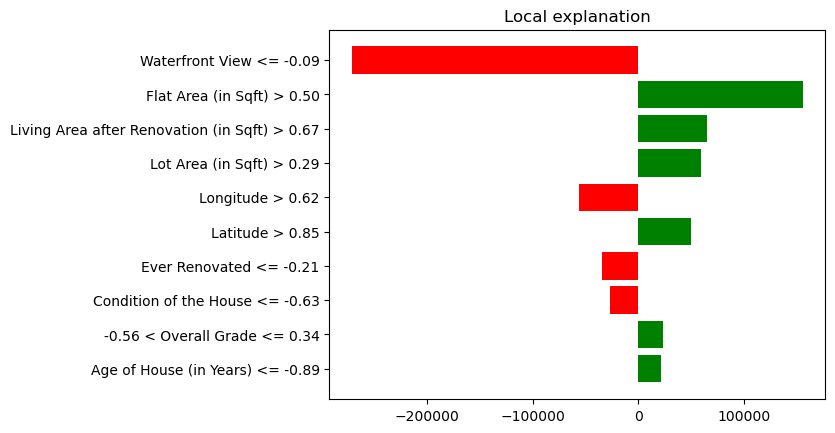

In [ ]:
import numpy as np
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# Train CatBoostRegressor
model = CatBoostRegressor(verbose=False)
model.fit(X_train, y_train)

# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, 
    mode='regression', 
    feature_names=X_train.columns.tolist(),
    discretize_continuous=True  
)

instance_idx = 0  
instance = X_test.iloc[instance_idx]

# Generate LIME explanation
explanation = explainer.explain_instance(
    instance.values, 
    model.predict,  
    num_features=10  
)

# Plot LIME explanation
explanation.as_pyplot_figure()
plt.show()


__Top Positive Influencers (Increase Price)__
- __Flat Area (in Sqft)__
- __Living Area after Renovation (Sqft)__
- __Lot Area (Sqft)__
- __Latitude__

__Top Negative Influencers (Decrease Price)__
- __Waterfront View (<= -0.09)__
- __Longitude__
- __Ever Renovated, Condition of the House__
- __Age of House__

### Plot y_pred and y_test

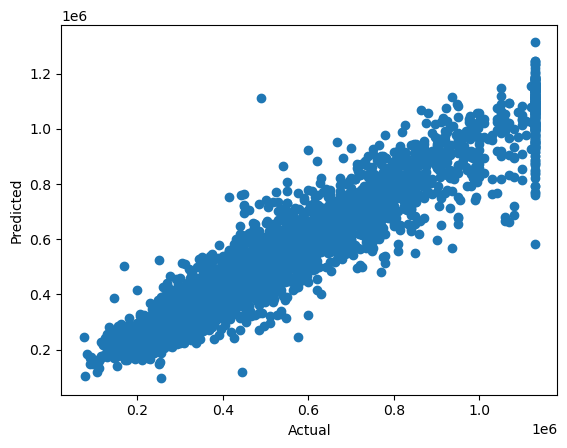

In [12]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

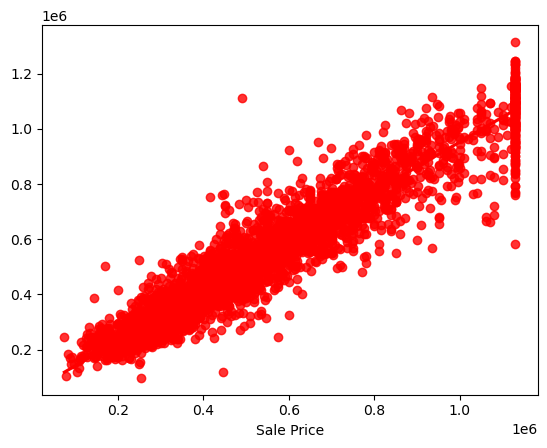

In [13]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [14]:
import pandas as pd

# Ensure y_test and y_pred are Pandas Series
y_test = y_test.squeeze()  # Convert DataFrame to Series
y_pred = y_pred.squeeze()  # Convert DataFrame to Series

# Create the DataFrame
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})

# Display first few rows
print(pred_df.head())



       Actual Value  Predicted Value    Difference
4982       570000.0    527071.490385  42928.509615
10254      720001.0    625911.415026  94089.584974
4044       267000.0    249660.299557  17339.700443
21267      365000.0    370652.798946  -5652.798946
10494      397000.0    487115.207185 -90115.207185
